In [375]:
import pandas as pd

#PART 1

Excercise (2.1)

In [376]:
file_path = "/content/CreditCard.csv"
df = pd.read_csv(file_path)

1) and 2) Downloaded the CSV file and read it with Pandas as required

In [377]:
df.describe()

,rownames,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,660.000000,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,380.906813,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,1.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,330.500000,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,660.000000,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,989.500000,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,1319.000000,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


3) As seen above, described the dataset.

In [378]:
rows, columns = df.shape
print(f"Number of rows : {rows}")
print(f"number of columns : {columns}")

Number of rows : 1319
number of columns : 13


4) This dataset has 1319 rows and 13 columns

In [379]:
from sklearn.model_selection import train_test_split

In [380]:
seed = 143

In [381]:
train_df, test_df = train_test_split(df, test_size=0.4, random_state=seed)
print(f"Training set size: {train_df.shape}")
print(f"Validation test size: {test_df.shape}")

Training set size: (791, 13)
Validation test size: (528, 13)


5) As seen above, we have split the dataset into training and testing.

6) Partitioning the data before conducting in-depth analysis is important for several reasons:

a) Prevents Data Leakage:

- If we analyze the entire dataset before splitting, we might unconsciously use insights from the validation/test set to influence model selection, leading to overfitting.

b) Ensures Fair Model Evaluation:

- By keeping a separate validation set, we can evaluate how well our model generalizes to unseen data, preventing an overly optimistic estimate of performance.

c) Mimics Real-World Scenarios:

- In practice, models are deployed on new data. Partitioning ensures that our model is trained on past data while being tested on unseen data, similar to real-world usage.

d) Prevents Bias in Feature Selection & Data Preprocessing:

- If feature engineering or transformations (like scaling, encoding, or outlier removal) are done on the full dataset, they may be influenced by the test set, leading to biased results.

e) Aids in Hyperparameter Tuning & Model Selection:

- With a validation set, we can fine-tune hyperparameters and compare models without touching the test set. This ensures that the final model evaluation is unbiased.

f) Reduces the Risk of Overfitting:

- If we use the same data for both training and testing, the model might memorize patterns instead of generalizing well to new data.



---



Excercise (2.1.1) Drilling Further

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

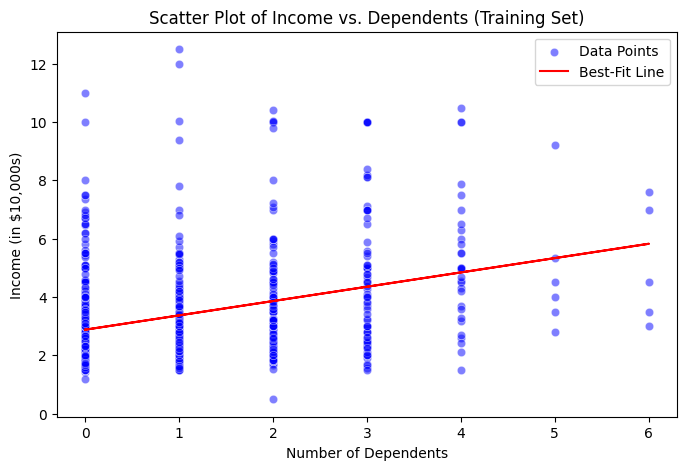

In [383]:
x = train_df['dependents']
y = train_df['income']


plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y, alpha=0.5, color='blue', label="Data Points")


m, b = np.polyfit(x, y, 1)  # Linear regression (y = mx + b)
plt.plot(x, m*x + b, color='red', label="Best-Fit Line")


plt.xlabel("Number of Dependents")
plt.ylabel("Income (in $10,000s)")
plt.title("Scatter Plot of Income vs. Dependents (Training Set)")
plt.legend()
plt.show()

Weak or No Strong Relationship:

- This makes sense because the number of dependents is not necessarily a direct predictor of income.
Other factors like education, job type, and experience likely play a bigger role in determining income.

Possible Explanation for Slight Positive Trend:

- People with more dependents might be older and further along in their careers, leading to slightly higher incomes.

Conclusion:

- The weak positive trend suggests having more dependents does not strongly impact income, but there might be a small effect due to career progression.
This aligns with real-world expectations, where income is influenced by multiple factors, not just dependents.

In [384]:
import scipy.stats as stats

In [385]:
correlation = train_df['income'].corr(train_df['dependents'])
print(f"Correlation between income and dependents: {correlation:.4f}")

Correlation between income and dependents: 0.3572


4)1)
- The correlation coefficient (r) is 0.3572, indicating a positive relationship between income and dependents.
- This means that as the number of dependents increases, income tends to increase as well.

4)2)
- 0.3572 suggests a moderate correlation (between 0.3 and 0.7).
- It’s not very strong, but there is a noticeable relationship.

In [386]:
corr_test = stats.pearsonr(train_df['income'], train_df['dependents'])
print(f"P-value: {corr_test.pvalue:.4f}")

P-value: 0.0000


4)3)
- The p-value is 0.0000, which is less than 0.05, meaning the correlation is statistically significant.
- This suggests that the relationship is unlikely due to random chance.

Possible Explanation:

- People with more dependents might be older, have more work experience, and thus earn higher incomes.
- However, correlation does not imply causation—other factors like education, job type, and career stage could also be influencing income.

In [387]:
import statsmodels.api as sm

In [388]:
X = train_df[['dependents']]
X = sm.add_constant(X)
y = train_df['income']
#regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     115.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           3.27e-25
Time:                        23:50:16   Log-Likelihood:                -1514.8
No. Observations:                 791   AIC:                             3034.
Df Residuals:                     789   BIC:                             3043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8754      0.074     38.655      0.0

5)
- As seen above, using the training dataset, a linear regression model has been created.

- The model shows a statistically significant but weak relationship between income and dependents.

- While having more dependents slightly increases income, the effect is not very strong.

- This makes sense intuitively—income is determined by many other factors beyond dependents.

In [389]:
residuals = model.resid
min_residual = residuals.min()
max_residual = residuals.max()

print(f"Minimum (most negative) residual: {min_residual:.4f}")
print(f"Maximum (most positive) residual: {max_residual:.4f}")

Minimum (most negative) residual: -3.3682
Maximum (most positive) residual: 9.1331


6) The most negative residual value is -3.3682 and the most positive residual value is 9.1331

In [390]:
train_df['predicted_income'] = model.predict(X)


train_df['residuals'] = train_df['income'] - train_df['predicted_income']

#observation with the highest residual
max_residual_index = train_df['residuals'].idxmax()
max_residual_row = train_df.loc[max_residual_index]


actual_income = max_residual_row['income']
predicted_income = max_residual_row['predicted_income']
highest_residual = max_residual_row['residuals']


print(f"Observation with highest residual: {max_residual_index}")
print(f"Actual Income: {actual_income:.4f}")
print(f"Predicted Income: {predicted_income:.4f}")
print(f"Highest Residual (Actual - Predicted): {highest_residual:.4f}")


Observation with highest residual: 446
Actual Income: 12.4999
Predicted Income: 3.3668
Highest Residual (Actual - Predicted): 9.1331


7) ABove we can observe the model's predictions.
- Here, it the residual value was calculated by:- Residual=Actual Income−Predicted Income

- The model underestimated this person’s income by $91,331.
- This suggests that dependents alone are not a strong predictor of income.
- There might be other factors (education, job type, industry, experience) that explain their high income.



In [391]:
min_residual_index = train_df['residuals'].idxmin()
min_residual_row = train_df.loc[min_residual_index]

actual_income_min = min_residual_row['income']
predicted_income_min = min_residual_row['predicted_income']
lowest_residual = min_residual_row['residuals']

print(f"Observation with lowest residual: {min_residual_index}")
print(f"Actual Income: {actual_income_min:.4f}")
print(f"Predicted Income: {predicted_income_min:.4f}")
print(f"Lowest Residual (Actual - Predicted): {lowest_residual:.4f}")

Observation with lowest residual: 1225
Actual Income: 0.4900
Predicted Income: 3.8582
Lowest Residual (Actual - Predicted): -3.3682


8) Above, we can observe the model's predictions.

- Here, residual was calculated by:- Residual=Actual Income−Predicted Income

- The model overestimated this person's income by $33,682.
- This suggests that dependents alone are not a strong predictor of income.
- There might be other factors that explain their lower-than-expected income, such as job type, employment status, or education level.

9) Dependents might be a reasonable starting point for predicting income because, in some cases, individuals with more dependents may be further along in their careers, have more financial responsibilities, and thus earn higher incomes.

However, dependents alone are not a strong predictor of income because many other factors play a significant role in determining earnings. For example Job type and Industry, their education and experience or maybe their emplyment location.

Because of these missing factors, the model sometimes overestimates or underestimates income by large amounts.

#Part 2

In [405]:
file_path = "/content/CreditCard.csv"
df_new = pd.read_csv(file_path)

In [406]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

seed_value_new = 143

# Splitting the dataset into training (60%) and validation (40%) sets
train_set_new, test_set_new = train_test_split(df_new, test_size=0.4, random_state=seed_value_new)

print(f"Training set size: {train_set_new.shape[0]} records")
print(f"Validation set size: {test_set_new.shape[0]} records")

Training set size: 791 records
Validation set size: 528 records


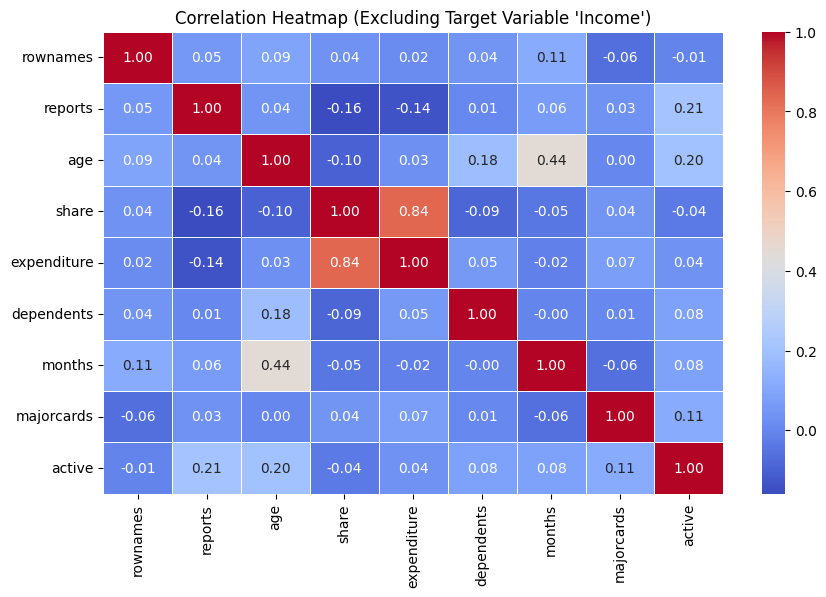

In [407]:
numerical_columns_new = train_set_new.select_dtypes(include=['number']).drop(columns=['income'])
correlation_matrix_new = numerical_columns_new.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_new, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Target Variable 'Income')")
plt.show()


Yes, multicollinearity could be an issue here. From your correlation heatmap, it appears that "expenditure" is strongly correlated with "share" (correlation ≈ 0.84).

In [408]:
# Remove "expenditure" from the training set
train_set_new = train_set_new.drop(columns=['expenditure'])

print("Updated training set after removing 'expenditure':")
print(train_set_new.head())

Updated training set after removing 'expenditure':
      rownames card  reports       age  income     share owner selfemp  \
103        104  yes        0  25.16667   1.800  0.098482    no      no   
714        715   no        0  27.08333   2.000  0.000600    no      no   
1310      1311  yes        0  30.58333   2.512  0.002627    no     yes   
54          55  yes        0  25.75000   2.400  0.020720    no      no   
500        501  yes        0  31.83333   4.075  0.007014   yes      no   

      dependents  months  majorcards  active  
103            0       1           0       9  
714            0      24           1       4  
1310           3      36           0       4  
54             0      34           1       2  
500            1     101           1       9  


I removed "expenditure" because it had a strong correlation (~0.84) with "share", indicating multicollinearity. When two predictor variables are highly correlated, they provide redundant information, which can lead to Inflated standard errors and Difficulty in interpreting the model.

In [409]:
import statsmodels.api as sm

# Use only "dependents" as predictor
X_check = train_set_new[["dependents"]]
X_check = sm.add_constant(X_check)  # Add intercept
y_check = train_set_new["income"]

# Fit the regression model
model_check = sm.OLS(y_check, X_check).fit()

# Print the summary to compare R-squared values
print(model_check.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     115.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           3.27e-25
Time:                        23:58:11   Log-Likelihood:                -1514.8
No. Observations:                 791   AIC:                             3034.
Df Residuals:                     789   BIC:                             3043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8754      0.074     38.655      0.0



---



2.2.1)

In [410]:
income_mean = train_set_new["income"].mean()
sst = ((train_set_new["income"] - income_mean) ** 2).sum()

print(f"Total Sum of Squares (SST): {sst}")

Total Sum of Squares (SST): 2445.696442067257


In [414]:
fitted_values = final_model_new.fittedvalues
ssr = ((fitted_values - income_mean) ** 2).sum()

print(f"Total Sum of Squares due to Regression (SSR): {ssr}")


Total Sum of Squares due to Regression (SSR): 533.3779670233478


In [415]:
#SST (Total Sum of Squares)
sst = ((train_set_new["income"] - income_mean) ** 2).sum()

#SSR (Sum of Squares for Regression)
ssr = ((final_model_new.fittedvalues - income_mean) ** 2).sum()

#SSR/SST
r_squared = ssr / sst

print(f"SSR/SST (R-squared): {r_squared}")

SSR/SST (R-squared): 0.2180883767294125


The SSR/SST ratio is the R-squared (R²) value, which is already displayed in the OLS Regression

In [416]:
# Choosing a predictor, e.g., "age"
predictor_name = "age"
t_value = final_model_new.tvalues[predictor_name]

print(f"T-value for {predictor_name}: {t_value}")

T-value for age: 7.421974118116926


In [417]:
f_statistic = final_model_new.fvalue

print(f"Model's F-statistic: {f_statistic}")

Model's F-statistic: 54.8071735371806


- The F-statistic tests whether at least one of our independent variables is significantly related to the dependent variable (income).
- A higher F-statistic indicates that the model explains more variance in the dependent variable relative to random chance.
- The p-value associated with the F-statistic (Prob > F) in our summary is likely very low (< 0.05), meaning your model is statistically significant.

In [418]:
def predict_income(age, dependents, majorcards, active):
    intercept = 0.9626
    beta_age = 0.0420
    beta_dependents = 0.4183
    beta_majorcards = 0.5158
    beta_active = 0.0258

    predicted_income = (
        intercept +
        beta_age * age +
        beta_dependents * dependents +
        beta_majorcards * majorcards +
        beta_active * active
    )

    return predicted_income

# Predict income for the fictional consumer
fictional_income = predict_income(age=35, dependents=2, majorcards=1, active=3)

print(f"Predicted Income: {fictional_income}")

Predicted Income: 3.8624000000000005


Here,
I assumed the consumer has the attributes like:

Age - 35

Dependantts - 2

Majorcards - 1

Active - 3

The predicted income calculation now will be:

0.9626+(0.0420×35)+(0.4183×2)+(0.5158×1)+(0.0258×3)

= 0.9626+1.47+0.8366+0.5158+0.0774

hence, income = 3.8624

So, the predicted income for this person is approximately $38,624.

In [419]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select only the features used in the final model
selected_features = final_model_new.model.exog_names
selected_features.remove("const")

# Compute predictions
train_predictions = final_model_new.predict(sm.add_constant(train_set_new[selected_features]))
validation_predictions = final_model_new.predict(sm.add_constant(test_set_new[selected_features]))

# Compute RMSE and R² for Training and Validation Sets
train_rmse = np.sqrt(mean_squared_error(train_set_new["income"], train_predictions))
validation_rmse = np.sqrt(mean_squared_error(test_set_new["income"], validation_predictions))

train_r2 = r2_score(train_set_new["income"], train_predictions)
validation_r2 = r2_score(test_set_new["income"], validation_predictions)

# Print Results
print(f"Training Set - RMSE: {train_rmse}, R²: {train_r2}")
print(f"Validation Set - RMSE: {validation_rmse}, R²: {validation_r2}")

Training Set - RMSE: 1.5548620676317846, R²: 0.21808837672941284
Validation Set - RMSE: 1.4869620751936237, R²: 0.12617933650242952


1) Findings on Model Performance:

- The R² value for training (0.218) is slightly higher than for validation (0.126), indicating that the model explains only a small portion of the variance in income.

- RMSE values are similar (Training: 1.55, Validation: 1.49), showing consistency but low predictive power.

- The model is not highly accurate, meaning other important factors influencing income might be missing.

2) Overfitting Risk & MLR vs. SLR Accuracy:

- The drop in R² from training to validation suggests mild overfitting, meaning the model captures training patterns better than unseen data.
- The MLR model (multiple linear regression) performed slightly better than the SLR model (single linear regression using dependents) in terms of R², but both models had low accuracy.
- The MLR model included multiple predictors, improving R² from 0.128 (SLR) to 0.218, but it still does not generalize well.

3) Limitations of Predicting Income with Available Variables:

- The dataset lacks key income-related factors like education level, job industry, work experience, and economic conditions.
- Many real-world income determinants are not captured in this dataset, limiting its predictive accuracy.
- The model assumes a linear relationship, which may not be the best fit for income prediction.



---

